In [1]:
import pandas as pd 
db_train_transaction=pd.read_csv("C:/Users/JUAN BUITRAGO/Downloads/train_transaction.csv")
db_train_identity=pd.read_csv("C:/Users/JUAN BUITRAGO/Downloads/train_identity.csv")

In [2]:
db_train=pd.merge(db_train_transaction,db_train_identity,on='TransactionID',how='left')

Detección de fraude

Los datos proceden de transacciones reales de comercio electrónico de Vesta y contienen una amplia gama
de características, desde el tipo de dispositivo hasta las características del producto. El objetivo principal es
mejorar la eficacia de las alertas de transacciones fraudulentas para millones de personas en todo el mundo,
ayudando a cientos de miles de empresas a reducir sus pérdidas por fraude y aumentar sus ingresos. Y, por
supuesto, ahorrará a muchas personas la molestia de los falsos positivos.

-TransactionDT: Intervalo de tiempo a partir de una fecha y hora de referencia
-TransactionAMT: Importe del pago de la transacción en USD
-ProductCD: Código de producto, el producto de cada transacción
-card1 - card6 : Información de la tarjeta de pago, como tipo de tarjeta, categoría de tarjeta, banco
emisor, país, etc.
-addr : Dirección
-dist: Distancia
-P_ and (R_) emaildomain: Dominio de correo electrónico del comprador y del destinatario
-C1-C14 : Recuento, cuántas direcciones se encuentran asociadas a la tarjeta de pago, etc. El significado
real está codificado.

-D1-D15 : Intervalo de tiempo, como los días transcurridos entre la transacción anterior, etc.
-M1-M9 : Coinciden, como los nombres en la tarjeta y la dirección, etc.
-Vxxx : Vesta ofrece una gran variedad de funciones, como la clasificación, el recuento y otras relaciones
entre entidades.
-DeviceType: Codificada. Información de identidad o conexión de red (IP, ISP, Proxy, etc) o firma digital
-DeviceInfo: Codificada. Información de identidad o conexión de red (IP, ISP, Proxy, etc) o firma digital
-id_12 - id_38 : Codificada. Información de identidad o conexión de red (IP, ISP, Proxy, etc) o firma
digital




In [3]:
db_train.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [4]:
db_train.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
id_36              object
id_37              object
id_38              object
DeviceType         object
DeviceInfo         object
Length: 434, dtype: object

Se va a eliminar el TransactionID ya que no nos va a explicar nada, simplemente es el ID de la transaction y debe ser unico para cada fila

In [3]:
db_train=db_train.drop(columns="TransactionID")

In [6]:
db_train.shape

(590540, 433)

In [7]:
db_train.isna().sum().sort_values(ascending=False)

id_24      585793
id_25      585408
id_08      585385
id_07      585385
id_21      585381
            ...  
C6              0
C5              0
C1              0
C2              0
isFraud         0
Length: 433, dtype: int64

hay columnas que tienen muchos datos faltantes entonces para no sintetizarlos todos utilizando la imputacion con la mediana se eliminaran las columnas que tengan por lo menos el 70% de datos faltantes y ya el resto se mirara si se sintetizara ya que si las dejamos ahi podemos generar cesgos en los datos y es preferible un poco de perdida de información 

In [4]:
umbral = 0.7 * len(db_train)
db_train = db_train.dropna(thresh=umbral, axis=1)
db_train

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [9]:
db_train.isna().sum().sort_values(ascending=False)

M6               169360
V43              168969
V51              168969
V50              168969
V49              168969
                  ...  
C12                   0
C13                   0
C14                   0
TransactionDT         0
isFraud               0
Length: 201, dtype: int64

se decidio quitar las filas que tienen datos faltantes para asi poder seguir con el problema y ya que no estaba dejando seguir por el uso de memoria RAM, se prefirio la perdida de informacion que cesgar la informacion

In [5]:
db_train=db_train.dropna()
db_train

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
1,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,...,135.000000,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
5,0,86510,49.00,W,5937,555.0,150.0,visa,226.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,0,86522,159.00,W,12308,360.0,150.0,visa,166.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590533,0,15811029,107.95,W,13071,321.0,150.0,visa,226.0,debit,...,209.949997,209.949997,209.949997,209.949997,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,...,117.000000,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [11]:
db_train.describe()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,328198.000000,3.281980e+05,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000,...,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000,328198.000000
mean,0.019823,7.926088e+06,156.961231,9940.171610,351.741101,149.995332,202.494388,289.382665,86.994997,8.878183,...,45.879261,26.629731,53.638986,33.821684,22.422151,78.540445,42.972268,15.353196,29.394252,20.340968
std,0.139393,4.402259e+06,269.366337,4853.600469,156.041451,0.942253,39.209974,101.258474,0.584866,29.082409,...,156.740746,110.984782,199.541804,136.064523,197.586337,618.807484,355.235584,162.718536,220.999013,185.112388
min,0.000000,8.640100e+04,2.000000,1001.000000,100.000000,100.000000,100.000000,104.000000,16.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.221687e+06,49.000000,6207.000000,206.000000,150.000000,166.000000,204.000000,87.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,8.002878e+06,82.000000,9839.000000,343.000000,150.000000,226.000000,299.000000,87.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.157863e+07,154.970000,13960.000000,490.000000,150.000000,226.000000,330.000000,87.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.581113e+07,6450.970000,18395.000000,600.000000,231.000000,235.000000,536.000000,96.000000,344.000000,...,4789.899902,4159.899902,7519.870117,4489.850098,16239.000000,32517.000000,18560.000000,12289.719727,12289.719727,12289.719727


In [12]:
db_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328198 entries, 1 to 590539
Columns: 201 entries, isFraud to V321
dtypes: float64(193), int64(3), object(5)
memory usage: 505.8+ MB


In [6]:
columnas_categoricas = db_train.select_dtypes(include=['object','int64']).columns
columnas_categoricas

Index(['isFraud', 'TransactionDT', 'ProductCD', 'card1', 'card4', 'card6',
       'P_emaildomain', 'M6'],
      dtype='object')

In [7]:
columnas_categoricas = db_train.select_dtypes(include=['object']).columns
columnas_categoricas

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M6'], dtype='object')

para simplicidad del EDA se escogeran 2 variables numericas y 2 variables categoricas para hacer el analisis de simetria, dispersion y demas.

Numericas= C1 y TransactionAmount
Categoricas= card4 y card6 

de todas formas se hara un analisis de correlacion y se mirara si estan correlacionadas primero con la variable target y 2 entre otras variables independientes y si estas no son importantes y/o salen por el analisis del VIF se realizara con las otras variables importante.


c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


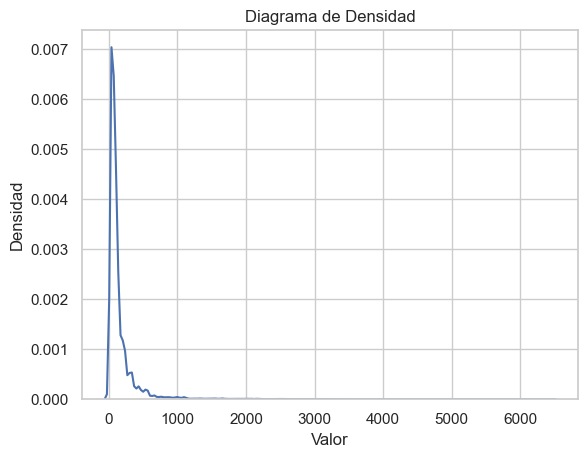

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# Crear un diagrama de densidad utilizando seaborn
sns.set(style="whitegrid")  # Establecer el estilo del fondo del gráfico
sns.kdeplot(data=db_train, x=db_train['TransactionAmt'], common_norm=False)

# Mostrar el gráfico
plt.xlabel('Valor')  # Etiqueta del eje X
plt.ylabel('Densidad')  # Etiqueta del eje Y
plt.title('Diagrama de Densidad')  # Título del gráfico
plt.show()

este dato esta cesgado hacia la derecha y no se podria confiar en la media ya que esta siendo jalada por los datos atipicos 

c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


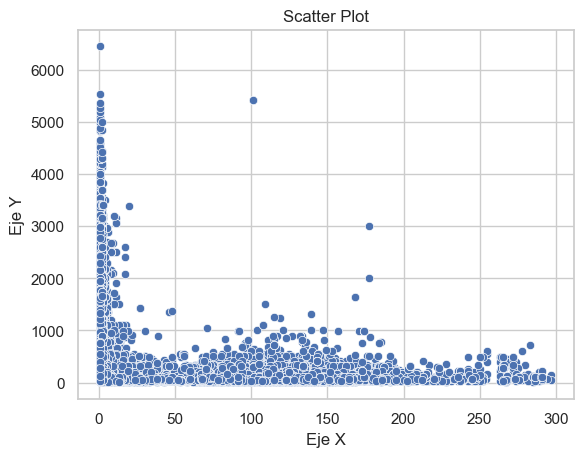

In [16]:

# Crear un scatter plot con seaborn
sns.scatterplot(x=db_train['C2'], y=db_train['TransactionAmt'], data=db_train)

# Mostrar el gráfico
plt.xlabel('Eje X')  # Etiqueta del eje X
plt.ylabel('Eje Y')  # Etiqueta del eje Y
plt.title('Scatter Plot')  # Título del gráfico
plt.show()

Se puede ver con este grafico que a medida que se aumenta el numero de direcciones asociadas la tarjeta de pago el importe de pago de la transaccion en USD disminuye su variabilidad por ejemplo cuando es cercano a 0 el rango es mucho mayor que en el otro extremo que es cuando es cercano a 300 

c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


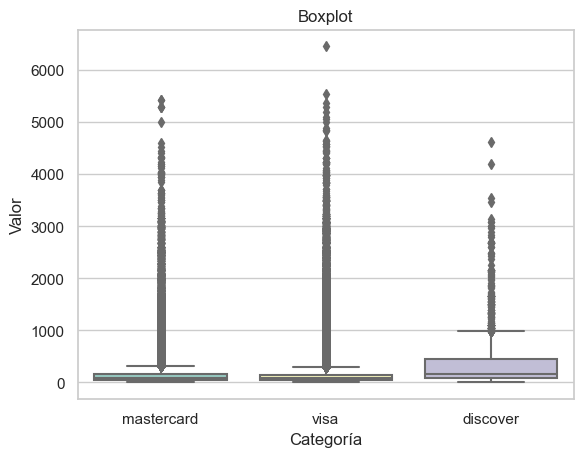

In [17]:
# Crear un boxplot con seaborn
sns.set(style="whitegrid")  # Establecer el estilo del fondo del gráfico
sns.boxplot(x=db_train['card4'], y=db_train['TransactionAmt'], data=db_train, palette="Set3")

# Mostrar el gráfico
plt.xlabel('Categoría')  # Etiqueta del eje X
plt.ylabel('Valor')  # Etiqueta del eje Y
plt.title('Boxplot')  # Título del gráfico
plt.show()

se puede ver que con mastercard y visa los datos atipicos son mucho mayores que con discover sin embargo se puede profundizar para ver si es la diferencia significativa entre cualquiera ya sea viSA O MASTERCAD con discover, se utilizara estadistica no parametrica para evitar el supuesto de normalidad ( de todas formas el diagrama de densidad incial nos pudo dar sospechas de que estos datos no siguen una distribucion normal al igual que nos lo puede decir el boxplot)

In [18]:
df_visa = db_train[db_train['card4'] == 'mastercard']
df_mastercard = db_train[db_train['card4'] == 'visa']
df_discover = db_train[db_train['card4'] == 'discover']

In [19]:
import scipy.stats as stats
# Realizar la prueba U de Mann-Whitney
stat, p_value = stats.mannwhitneyu(df_visa['TransactionAmt'], df_discover['TransactionAmt'], alternative='two-sided')  # 'two-sided' para una prueba de dos colas

# Mostrar el estadístico de la prueba y el valor p
print("Estadístico de la prueba U de Mann-Whitney:", stat)
print("Valor p:", p_value)

# Interpretar los resultados
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula: Hay evidencia suficiente para decir que las medianas son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: No hay suficiente evidencia para afirmar que las medianas son diferentes.")

Estadístico de la prueba U de Mann-Whitney: 60034960.0
Valor p: 3.748610376536109e-200
Se rechaza la hipótesis nula: Hay evidencia suficiente para decir que las medianas son diferentes.


se escogen dos colas ya que no se quiere saber direccion solo si es diferente y la prueba nos dice que si es estadisticamente signfica la diferencia de medianas 

se realizara onehotencoding ya que se va a mirar el VIF para hacer reduccion de dimensionalidad 

c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


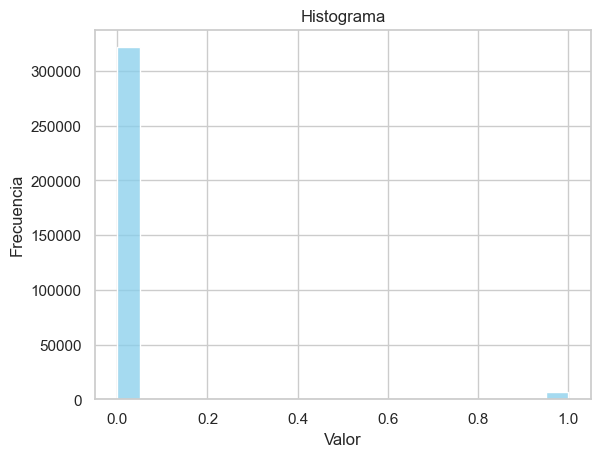

In [20]:
sns.set(style="whitegrid")  # Establecer el estilo del fondo del gráfico
sns.histplot(db_train['isFraud'], kde=False, color='skyblue')

# Mostrar el gráfico
plt.xlabel('Valor')  # Etiqueta del eje X
plt.ylabel('Frecuencia')  # Etiqueta del eje Y
plt.title('Histograma')  # Título del gráfico
plt.show()

In [21]:
db_train['isFraud'].value_counts()

isFraud
0    321692
1      6506
Name: count, dtype: int64

In [22]:
db_train["ProductCD"].value_counts()

ProductCD
W    328198
Name: count, dtype: int64

como siempre es la misma se eliminara ya que no nos implica nada 

In [8]:
db_train=db_train.drop(columns='ProductCD')

para simplificar el ejercercicio se utilizara una muestra aleatoria y se conservara el problema de desbalanceo de los datos para asi poder calcular el VIF 

In [9]:
db_train_1 = db_train.sample(n=10000, random_state=42) 

In [10]:
numericas=db_train_1.drop(columns=['card4', 'card6', 'P_emaildomain', 'M6','isFraud'])
categoricas=db_train_1[['card4', 'card6', 'P_emaildomain', 'M6']]
y=db_train_1['isFraud']

In [25]:
#%pip install statsmodels

In [11]:
# Calcula el VIF para cada variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Variable'] = numericas.columns
vif_data['VIF'] = [variance_inflation_factor(numericas.values, i) for i in range(numericas.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)


c:\miniconda\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\miniconda\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\miniconda\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [12]:
vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

,Variable,VIF
191,V318,inf
153,V280,inf
148,V134,9.007199e+15
189,V316,9.007199e+15
168,V295,9.007199e+15
...,...,...
106,V92,NaN
107,V93,NaN
175,V302,NaN
176,V303,NaN


como nos estamos dando cuenta las V nos estan dando errores entonces borraremos esas variables de la base de datos 

In [13]:
# Obtener una lista de todas las columnas que comienzan con 'V'
columnas_a_eliminar = [col for col in db_train.columns if col.startswith('V')]

# Eliminar las columnas que comienzan con 'V'
db_train = db_train.drop(columns=columnas_a_eliminar)

In [14]:
db_train.shape

(328198, 31)

repitiremos el proceso del VIF 

In [15]:
numericas=db_train.drop(columns=['card4', 'card6', 'P_emaildomain', 'M6','isFraud'])
categoricas=db_train[['card4', 'card6', 'P_emaildomain', 'M6']]
y=db_train_1['isFraud']

In [16]:
vif_data = pd.DataFrame()
vif_data['Variable'] = numericas.columns
vif_data['VIF'] = [variance_inflation_factor(numericas.values, i) for i in range(numericas.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

c:\miniconda\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [17]:
vif_data

,Variable,VIF
7,addr2,11765.361328
4,card3,11754.878217
8,C1,347.742633
18,C11,229.045729
21,C14,183.486887
9,C2,164.808740
16,C9,74.912712
13,C6,66.479896
20,C13,31.170451
5,card5,28.182240


In [18]:
db_train=db_train.drop(columns={"C3","C4","C7","C8","C10"})
numericas=db_train.drop(columns=['card4', 'card6', 'P_emaildomain', 'M6','isFraud'])
categoricas=db_train[['card4', 'card6', 'P_emaildomain', 'M6']]
y=db_train_1['isFraud']

In [19]:
var=6
while var>5 :
    vif_data = pd.DataFrame()
    vif_data['Variable'] = numericas.columns
    vif_data['VIF'] = [variance_inflation_factor(numericas.values, i) for i in range(numericas.shape[1])]
    vif_data = vif_data.sort_values(by='VIF', ascending=False)
    vif_data = vif_data.reset_index(drop=True)
    var=vif_data["VIF"][0]
    if var>5:
        X=vif_data["Variable"][0]
        numericas=numericas.drop(columns=X)

In [20]:
vif_data

,Variable,VIF
0,card2,4.007560
1,card1,3.681911
2,TransactionDT,3.497395
3,D4,3.136145
4,D10,2.837820
5,D1,2.377341
6,TransactionAmt,1.325731
7,C12,1.120898
8,C5,1.085837


Para entrenar el modelo solo nos vamos a quedar con estas variables numericas y las categoricas las vamos a eliminar con el heatmap de chicuadrado 

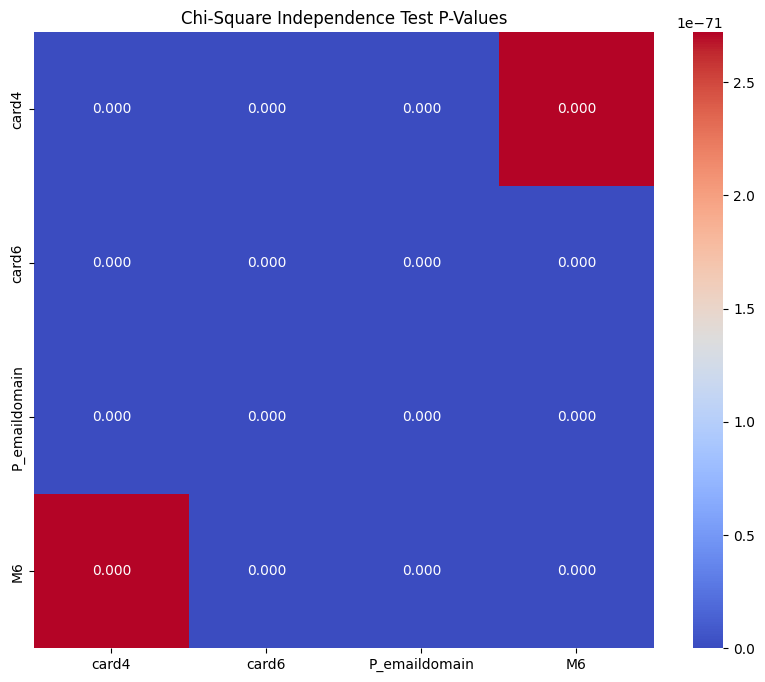

In [25]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

p_values = []
columns = categoricas.columns  # Obtener el nombre de las columnas
for col1 in columns:
    row_pvalues = []
    for col2 in columns:
        contingency_table = pd.crosstab(categoricas[col1], categoricas[col2])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        row_pvalues.append(p)
    p_values.append(row_pvalues)

# Crear un DataFrame con los p-values y los nombres de las columnas
p_values_df = pd.DataFrame(p_values, columns=columns, index=columns)

# Crear un heatmap con los p-values
plt.figure(figsize=(10, 8))
sns.heatmap(p_values_df, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Chi-Square Independence Test P-Values')
plt.show()


In [37]:
contingency_table = pd.crosstab(categoricas["card4"], categoricas["M6"])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(p)

2.7211389436099226e-71


como todas dieron menor a 0.05 significan que hay pruebas para decir que son dependientes entonces para evitar multicolinealidad se sacaran de la prueba menos 1 que sera card4 

In [21]:
 variables=["card4","card2","card1","TransactionDT","D4","D10","D1","TransactionAmt","C13","C12"]
X=db_train[variables]
X=pd.get_dummies(X, dtype=float)
Y=db_train["isFraud"]
 

# COMENZAMOS CON LOS MODELOS DE CLASIFICACION 

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [23]:
y_train.value_counts()

isFraud
0    241299
1      4849
Name: count, dtype: int64

esta desbalanceado por lo que se hara el respectivo balanceo de los datos 

In [24]:
from imblearn.over_sampling import RandomOverSampler
# Inicializar el objeto RandomOverSampler
ros = RandomOverSampler(random_state=42)  # Puedes ajustar el estado aleatorio según sea necesario

# Aplicar Random Oversampling a tus datos de entrenamiento
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [25]:
from sklearn.model_selection import GridSearchCV
import pickle
import glob
from time import process_time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## KNN 

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7],  # Diferentes valores para el número de vecinos
    'p': [1, 2]  # Diferentes valores para la métrica de distancia (Manhattan y Euclidiana)
}

knn = KNeighborsClassifier()

In [26]:
if (len(glob.glob("grid_knn_p1.pkl")) != 0):
    grid_knn = pickle.load(open('grid_knn_p1.pkl','rb'))
else:
    time_start = process_time()
    grid_knn = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
    grid_knn.fit(X_train_resampled, y_train_resampled)
    time_stop = process_time()
    str_cpu_time = "GridSearchCV CPU time: " + str((time_stop-time_start)*0.6) + " minutes"
    print(str_cpu_time) 
    with open('cpu_time.txt', 'w', encoding='utf-8') as f:
        f.write(str_cpu_time)
    pickle.dump(grid_knn, open('grid_knn_p1.pkl', 'wb'))

print("Best CV score = %0.3f:" % grid_knn.best_score_)
print("Best parameters:\n{}".format(grid_knn.best_params_))

Best CV score = 0.990:
Best parameters:
{'n_neighbors': 3, 'p': 2}


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred_knn = grid_knn.predict(X_test)

# Calcular métricas
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

In [28]:
from sklearn.metrics import roc_auc_score
knn_auc = roc_auc_score(y_test, grid_knn.predict_proba(X_test)[:, 1])
print("AUC for knn: {:.3f}".format(knn_auc))

AUC for knn: 0.636


In [29]:
models = ['KNN', 'Ridge', 'Lasso', 'Naive Bayes', 'XGBoost', 'SVM', 'MLP']
precisions = []
recalls = []
f1_scores = []
auc_scores = []

precisions.append(knn_precision)
recalls.append(knn_recall)
f1_scores.append(knn_f1)
auc_scores.append(knn_auc)

## ridge

In [37]:
from sklearn.linear_model import RidgeClassifier, Lasso
ridge = RidgeClassifier()
param_grid = {
'alpha':[0.1,1,2,3,10]
}

In [30]:
if (len(glob.glob("grid_ridge_p1.pkl")) != 0):
    grid_ridge = pickle.load(open('grid_ridge_p1.pkl','rb'))
else:
    time_start = process_time()
    grid_ridge = GridSearchCV(ridge, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
    grid_ridge.fit(X_train_resampled, y_train_resampled)
    time_stop = process_time()
    str_cpu_time = "GridSearchCV CPU time: " + str((time_stop-time_start)*0.6) + " minutes"
    print(str_cpu_time) 
    with open('cpu_time.txt', 'w', encoding='utf-8') as f:
        f.write(str_cpu_time)
    pickle.dump(grid_ridge, open('grid_ridge_p1.pkl', 'wb'))

print("Best CV score = %0.3f:" % grid_ridge.best_score_)
print("Best parameters:\n{}".format(grid_ridge.best_params_))

Best CV score = 0.668:
Best parameters:
{'alpha': 10}


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred_ridge = grid_ridge.predict(X_test)

# Calcular métricas
ridge_accuracy = accuracy_score(y_test, y_pred_ridge)
ridge_precision = precision_score(y_test, y_pred_ridge)
ridge_recall = recall_score(y_test, y_pred_ridge)
ridge_f1 = f1_score(y_test, y_pred_ridge)

In [32]:
ridge_auc = roc_auc_score(y_test, y_pred_ridge)
print("AUC for ridge: {:.3f}".format(ridge_auc))

AUC for ridge: 0.615


In [33]:
precisions.append(ridge_precision)
recalls.append(ridge_recall)
f1_scores.append(ridge_f1)
auc_scores.append(ridge_auc)

## LASSO

In [43]:
from sklearn.linear_model import LogisticRegression
lasso = LogisticRegression(penalty='l1', solver='liblinear')

param_grid = {
    'penalty': ['l1'],  # Usar L1 para regularización (Lasso)
    'C': [0.1, 1, 10]  # Inversa del parámetro de regularización; valores más pequeños indican una regularización más fuerte
}

In [36]:
if (len(glob.glob("grid_lasso_p1.pkl")) != 0):
    grid_lasso = pickle.load(open('grid_lasso_p1.pkl','rb'))
else:
    time_start = process_time()
    grid_lasso = GridSearchCV(lasso, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
    grid_lasso.fit(X_train_resampled, y_train_resampled)
    time_stop = process_time()
    str_cpu_time = "GridSearchCV CPU time: " + str((time_stop-time_start)*0.6) + " minutes"
    print(str_cpu_time) 
    with open('cpu_time.txt', 'w', encoding='utf-8') as f:
        f.write(str_cpu_time)
    pickle.dump(grid_lasso, open('grid_lasso_p1.pkl', 'wb'))


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred_lasso = grid_lasso.predict(X_test)

# Calcular métricas
lasso_accuracy = accuracy_score(y_test, y_pred_lasso)
lasso_precision = precision_score(y_test, y_pred_lasso)
lasso_recall = recall_score(y_test, y_pred_lasso)
lasso_f1 = f1_score(y_test, y_pred_lasso)

In [37]:
lasso_auc = roc_auc_score(y_test, grid_lasso.predict_proba(X_test)[:, 1])
print("AUC for knn: {:.3f}".format(lasso_auc))

AUC for knn: 0.622


In [38]:
precisions.append(lasso_precision)
recalls.append(lasso_recall)
f1_scores.append(lasso_f1)
auc_scores.append(lasso_auc)

## naive bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
import numpy as np


clf = GaussianNB()

from sklearn.model_selection import cross_val_score

In [41]:
if (len(glob.glob("grid_clf_p1.pkl")) != 0):
    grid_lasso = pickle.load(open('grid_clf_p1.pkl','rb'))
else:
    time_start = process_time()
    model_clf=clf.fit(X_train_resampled,y_train_resampled)
    clfscore=cross_val_score(model_clf,X_train_resampled,y_train_resampled,cv=5,scoring='roc_auc')
    print(np.mean(clfscore))
    time_stop = process_time()
    str_cpu_time = "GridSearchCV CPU time: " + str((time_stop-time_start)*0.6) + " minutes"
    print(str_cpu_time) 
    with open('cpu_time.txt', 'w', encoding='utf-8') as f:
        f.write(str_cpu_time)
    pickle.dump(model_clf, open('grid_lasso_p1.pkl', 'wb'))

print(np.mean(clfscore))

0.6343988116988312
GridSearchCV CPU time: 0.459375 minutes
0.6343988116988312


In [42]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred = model_clf.predict(X_test)

# Calcular métricas
clf_accuracy = accuracy_score(y_test, y_pred)
clf_precision = precision_score(y_test, y_pred)
clf_recall = recall_score(y_test, y_pred)
clf_f1 = f1_score(y_test, y_pred)

In [43]:
clf_auc = roc_auc_score(y_test, model_clf.predict_proba(X_test)[:, 1])
print("AUC for knn: {:.3f}".format(clf_auc))

AUC for knn: 0.622


In [44]:
precisions.append(clf_precision)
recalls.append(clf_recall)
f1_scores.append(clf_f1)
auc_scores.append(clf_auc)

## XGboost 

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

# Definir los posibles valores para los parámetros de XGBoost
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
}

# Crear un clasificador XGBoost
xgb_classifier = GradientBoostingClassifier(random_state=42)

In [45]:
if (len(glob.glob("grid_xgb_p1.pkl")) != 0):
    grid_xgb = pickle.load(open('grid_xgb_p1.pkl','rb'))
else:
    time_start = process_time()
    grid_xgb = GridSearchCV(xgb_classifier, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
    grid_xgb.fit(X_train_resampled, y_train_resampled)
    time_stop = process_time()
    str_cpu_time = "GridSearchCV CPU time: " + str((time_stop-time_start)*0.6) + " minutes"
    print(str_cpu_time) 
    with open('cpu_time.txt', 'w', encoding='utf-8') as f:
        f.write(str_cpu_time)
    pickle.dump(grid_xgb, open('grid_xgb_p1.pkl', 'wb'))

print("Best CV score = %0.3f:" % grid_xgb.best_score_)
print("Best parameters:\n{}".format(grid_xgb.best_params_))

Best CV score = 0.815:
Best parameters:
{'learning_rate': 0.1, 'n_estimators': 100}


In [46]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred = grid_xgb.predict(X_test)

# Calcular métricas
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)

In [47]:
xgb_auc = roc_auc_score(y_test, grid_xgb.predict_proba(X_test)[:, 1])
print("AUC for knn: {:.3f}".format(xgb_auc))

AUC for knn: 0.793


In [48]:
precisions.append(xgb_precision)
recalls.append(xgb_recall)
f1_scores.append(xgb_f1)
auc_scores.append(xgb_auc)

## SVM  

debido a altos costos de procesamiento se bajaran la cantidad de filas del training a 10.000 filas para este y el de mlp que son los modelos que quedan. 

In [49]:
# Cuenta cuántas filas hay para cada categoría
count_class_0, count_class_1 = y_train_resampled.value_counts()

# Define cuántas filas quieres para cada categoría
desired_class_0 = desired_class_1 = 5000

# Selecciona aleatoriamente las filas para cada categoría
subset_class_0 = y_train_resampled[y_train_resampled == 0].sample(n=desired_class_0, random_state=42)
subset_class_1 = y_train_resampled[y_train_resampled == 1].sample(n=desired_class_1, random_state=42)

# Combina las filas seleccionadas
subset_y_train = pd.concat([subset_class_0, subset_class_1])
subset_x_train = X_train_resampled.loc[subset_y_train.index]

In [50]:
import pickle 
import glob 
from time import process_time

In [52]:
from sklearn.svm import SVC

# Definir los posibles valores para los parámetros de SVM
param_grid = {
    'kernel': ['linear', 'sigmoid'],
}

# Crear un clasificador SVM para clasificación
svm_classifier = SVC(random_state=42,C=0.1,gamma=0.1)

In [62]:
grid_svm = None

if (len(glob.glob("grid_svm_p1.pkl")) != 0):
    grid_svm = pickle.load(open('grid_svm_p1.pkl','rb'))
else:
    time_start = process_time()
    grid_svm = GridSearchCV(svm_classifier, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
    grid_svm.fit(subset_x_train, subset_y_train)
    time_stop = process_time()
    str_cpu_time = "GridSearchCV CPU time: " + str((time_stop-time_start)*0.6) + " minutes"
    print(str_cpu_time) 
    with open('cpu_time.txt', 'w', encoding='utf-8') as f:
        f.write(str_cpu_time)
    pickle.dump(grid_svm, open('grid_svm_p1.pkl', 'wb'))

print("Best CV score = %0.3f:" % grid_svm.best_score_)
print("Best parameters:\n{}".format(grid_svm.best_params_))

KeyboardInterrupt: 

debido a altos tiempos de procesamiento se escogieron los parametros y instanciara el modelo y ya.

In [53]:
svc=SVC(random_state=42,kernel='sigmoid',C=0.1,gamma=0.1)
svc.fit(subset_x_train,subset_y_train)

SVC(C=0.1, gamma=0.1, kernel='sigmoid', random_state=42)

In [54]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred = svc.predict(X_test)

# Calcular métricas
svc_accuracy = accuracy_score(y_test, y_pred)
svc_precision = precision_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_f1 = f1_score(y_test, y_pred)

c:\miniconda\envs\ml_venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
svc_auc = roc_auc_score(y_test, y_pred)
print("AUC for knn: {:.3f}".format(svc_auc))

AUC for knn: 0.500


In [57]:
precisions.append(svc_precision)
recalls.append(svc_recall)
f1_scores.append(svc_f1)
auc_scores.append(svc_auc)

## MLP 

In [63]:
from sklearn.neural_network import MLPClassifier

param_grid = {'alpha': [0.1, 0.01],
              'hidden_layer_sizes': [(10,), (100,)]}

mlp=MLPClassifier(max_iter=1000, random_state=42,learning_rate='constant',activation='relu')

In [64]:
grid_mlp = None

if (len(glob.glob("grid_mlp_p1.pkl")) != 0):
    grid_mlp = pickle.load(open('grid_mlp_p1.pkl','rb'))
else:
    time_start = process_time()
    grid_mlp = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
    grid_mlp.fit(X_train_resampled, y_train_resampled)
    time_stop = process_time()
    str_cpu_time = "GridSearchCV CPU time: " + str((time_stop-time_start)*0.6) + " minutes"
    print(str_cpu_time) 
    with open('cpu_time.txt', 'w', encoding='utf-8') as f:
        f.write(str_cpu_time)
    pickle.dump(grid_mlp, open('grid_mlp_p1.pkl', 'wb'))

print("Best CV score = %0.3f:" % grid_mlp.best_score_)
print("Best parameters:\n{}".format(grid_mlp.best_params_))

GridSearchCV CPU time: 7.5093749999999995 minutes
Best CV score = 0.574:
Best parameters:
{'alpha': 0.01, 'hidden_layer_sizes': (10,)}


In [65]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred = grid_mlp.predict(X_test)

# Calcular métricas
mlp_accuracy = accuracy_score(y_test, y_pred)
mlp_precision = precision_score(y_test, y_pred)
mlp_recall = recall_score(y_test, y_pred)
mlp_f1 = f1_score(y_test, y_pred)

In [66]:
mlp_auc = roc_auc_score(y_test, grid_mlp.predict_proba(X_test)[:, 1])
print("AUC for knn: {:.3f}".format(mlp_auc))

AUC for knn: 0.523


In [68]:
precisions.append(mlp_precision)
recalls.append(mlp_recall)
f1_scores.append(mlp_f1)
auc_scores.append(mlp_auc)

## MATRIZ DE RESULTADOS

In [69]:
data = {
    'Model': models,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'AUC Score': auc_scores
}

df = pd.DataFrame(data)

df

,Model,Precision,Recall,F1 Score,AUC Score
0,KNN,0.150158,0.287266,0.197224,0.635994
1,Ridge,0.032095,0.605914,0.060961,0.614645
2,Lasso,0.024321,0.784550,0.047179,0.621945
3,Naive Bayes,0.024321,0.784550,0.047179,0.621945
4,XGBoost,0.054044,0.684369,0.100177,0.793178
5,SVM,0.000000,0.000000,0.000000,0.500000
6,MLP,0.021041,0.973446,0.041192,0.522866


el modelo que nos dio mejores resultados fue el XGboost 

# PROBLEMA DE REGRESION 

In [1]:
import pandas as pd 
data_train=pd.read_csv("C:/Users/JUAN BUITRAGO/Downloads/data_treino_dv_df_2000_2010 (1).csv")
data_test=pd.read_csv("C:/Users/JUAN BUITRAGO/Downloads/data_teste_dv_df_2011.csv")

por temas de recursos computacionales se eliminaran las filas con nan 

In [2]:
data_train=data_train.dropna()
data_train

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87688,19:00,-0.615661,5.6,83.0,78.0,21.8,21.1,80.0,879.1,0.0,12.3,879.8,879.1
87689,20:00,-0.469472,4.9,84.0,79.0,21.7,21.0,84.0,879.2,0.0,9.9,879.2,878.9
87690,21:00,-0.484810,4.5,86.0,82.0,21.2,20.6,86.0,879.7,0.0,8.9,879.8,879.2
87691,22:00,-0.484810,3.2,88.0,85.0,20.6,20.2,88.0,880.5,0.0,8.0,880.5,879.6


In [100]:
data_train.describe()

,"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
count,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000
mean,0.405810,2.466192,69.058465,63.176194,21.921264,20.684570,66.146682,887.251925,0.160907,5.161076,887.580724,886.891093
std,0.686247,1.313968,19.640222,20.166336,3.721386,3.513744,19.992327,4.012404,1.307515,2.311157,3.646750,3.564539
min,-1.000000,0.000000,12.000000,10.000000,9.200000,8.400000,10.000000,863.400000,0.000000,0.000000,865.300000,862.800000
25%,-0.156434,1.500000,54.000000,48.000000,19.200000,18.400000,51.000000,885.300000,0.000000,3.400000,885.600000,885.000000
50%,0.788011,2.400000,72.000000,64.000000,21.400000,20.200000,68.000000,887.200000,0.000000,5.000000,887.500000,886.900000
75%,0.970296,3.400000,87.000000,80.000000,24.700000,23.100000,84.000000,889.100000,0.000000,6.800000,889.300000,888.800000
max,1.000000,10.000000,100.000000,98.000000,35.300000,34.400000,99.000000,1023.500000,70.800000,24.300000,913.100000,910.900000


In [3]:
data_train=data_train.drop(columns='PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)')

In [4]:
data_train=data_train.drop(columns='HORA (UTC)')

In [5]:
data_train2=data_train.drop(columns='VENTO, VELOCIDADE HORARIA (m/s)')

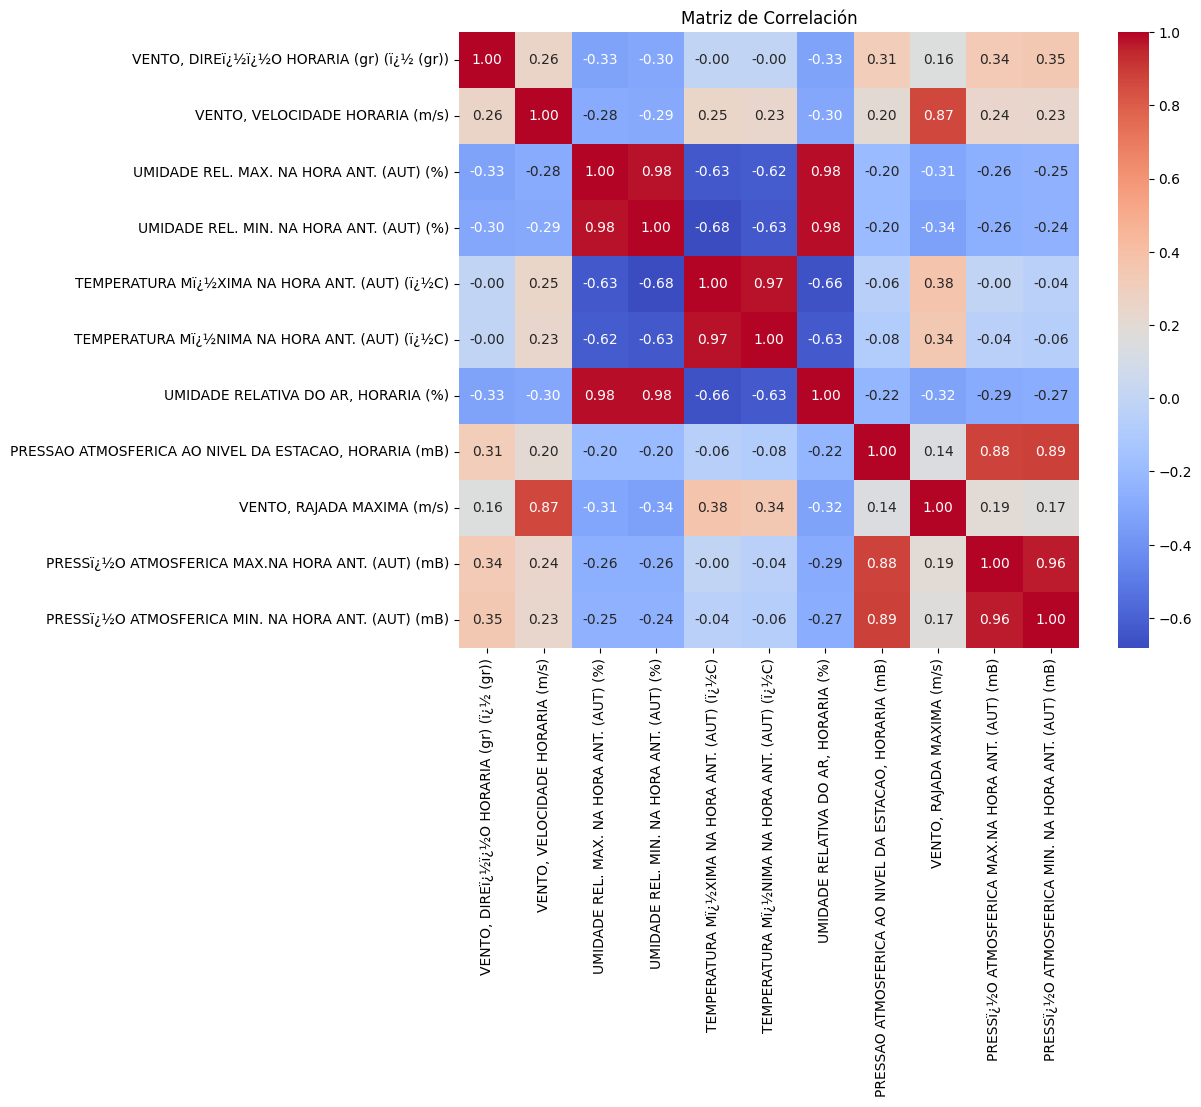

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calcula la matriz de correlación
correlation_matrix = data_train.corr()

# Crea un heatmap de la matriz de correlación usando seaborn
plt.figure(figsize=(10, 8))  # Ajusta el tamaño del heatmap si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')  

# Añade etiquetas a los ejes y título al heatmap
plt.title('Matriz de Correlación')

# Muestra el heatmap
plt.show()

es bueno que vento, parada maxima quedara despues del vif ya que esta es una de las variables mas relacionadas con nuestra variable a predecir que es la velocidad del viento

c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\miniconda\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


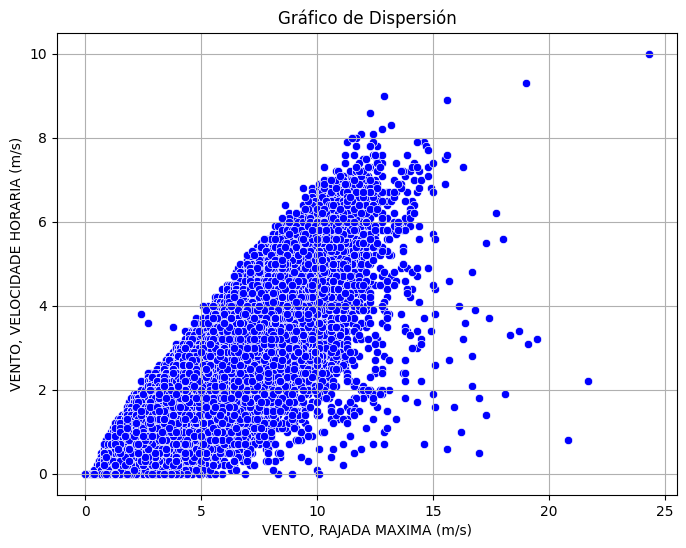

In [38]:
# Crea un gráfico de dispersión con seaborn
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico si es necesario
sns.scatterplot(x=data_train['VENTO, RAJADA MAXIMA (m/s)'], y=data_train['VENTO, VELOCIDADE HORARIA (m/s)'], color='blue', marker='o')  # Configura el color y el marcador
plt.xlabel('VENTO, RAJADA MAXIMA (m/s)')  # Etiqueta del eje x
plt.ylabel('VENTO, VELOCIDADE HORARIA (m/s)')  # Etiqueta del eje y
plt.title('Gráfico de Dispersión')  # Título del gráfico
plt.grid(True)  # Muestra la cuadrícula
plt.show()  # Muestra el gráfico

esto es una forma de ver esta relacion lineal positiva que hay entre estas variables y tiene sentido ya que a maxima rafaga de viento debe existir una mayor velocidad del viento 

In [93]:
var=6
while var>5 :
    vif_data = pd.DataFrame()
    vif_data['Variable'] = data_train2.columns
    vif_data['VIF'] = [variance_inflation_factor(data_train2.values, i) for i in range(data_train2.shape[1])]
    vif_data = vif_data.sort_values(by='VIF', ascending=False)
    vif_data = vif_data.reset_index(drop=True)
    var=vif_data["VIF"][0]
    if var>5:
        X=vif_data["Variable"][0]
        data_train2=data_train2.drop(columns=X)

In [94]:
vif_data

,Variable,VIF
0,"VENTO, RAJADA MAXIMA (m/s)",3.644319
1,UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),3.182363
2,"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))",1.374806


In [6]:
X_trainr=data_train[['VENTO, RAJADA MAXIMA (m/s)','UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)','VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))']]
Y_trainr=data_train['VENTO, VELOCIDADE HORARIA (m/s)']

se crearan 5 plieges aumentando el tamaño 

In [7]:
X_testr=X_trainr[-24:]
Y_testr=Y_trainr[-24:]

In [8]:
# Eliminar las últimas 24 filas de X_trainr
X_trainr = X_trainr.drop(X_trainr.tail(24).index)

# Eliminar las últimas 24 filas de Y_trainr
Y_trainr = Y_trainr.drop(Y_trainr.tail(24).index)


In [9]:
X_trainr

,"VENTO, RAJADA MAXIMA (m/s)",UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))"
0,3.8,60.0,0.809017
1,4.7,55.0,0.965926
2,4.9,50.0,0.891007
3,5.8,44.0,0.848048
4,5.8,43.0,0.224951
...,...,...,...
87664,9.2,72.0,-0.453990
87665,7.8,77.0,-0.559193
87666,7.0,82.0,-0.629320
87667,5.2,84.0,-0.891007


In [10]:
horas=[24,48,72,96,120]

# MODELOS DE REGRESION

### KNN

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import numpy as np

In [14]:
horas=[24,48,72,96,120,]
best_score = float('inf')
best_parameters = {}


for kn in [3, 5, 6, 7, 9]:
    for pn in [1, 2]:
        rmse_list=[]    
        for i in horas:
            knn=KNeighborsRegressor(n_neighbors=kn,p=pn)
            x_val=X_trainr[-i:]
            y_val=Y_trainr[-i:]
    
            x_train= X_trainr[-i*2:-i]
            y_train = Y_trainr[-i*2:-i]
            
            knn.fit(x_train,y_train)
            y_pred=knn.predict(x_val)
            rmse = np.sqrt(mean_squared_error(y_val, y_pred))
            rmse_list.append(rmse)
        rmse_mean=np.mean(rmse_list)
        if rmse_mean<best_score:
            best_score = rmse
            best_parameters = {'n_neighbors': kn, 'p': pn}


print(best_parameters)            
print(best_score)           
    
    

{'n_neighbors': 9, 'p': 2}
1.2555969347491416


In [15]:
best_knn_regressor = KNeighborsRegressor(n_neighbors=best_parameters['n_neighbors'], p=best_parameters['p'])
best_knn_regressor.fit(X_trainr, Y_trainr)  # Suponiendo que tienes datos de entrenamiento X_train y etiquetas Y_train

# Realiza predicciones en el conjunto de prueba
y_pred = best_knn_regressor.predict(X_testr)  # Suponiendo que tienes datos de prueba X_test

# Calcula MAPE
mape_knn = np.mean(np.abs((Y_testr - y_pred) / Y_testr)) * 100
print(f'MAPE en el conjunto de prueba: {mape_knn}%')

# Calcula RMSE
rmse_knn = np.sqrt(mean_squared_error(Y_testr, y_pred))
print(f'RMSE en el conjunto de prueba: {rmse_knn}')

# Calcula R²
r2_knn = r2_score(Y_testr, y_pred)
print(f'R² en el conjunto de prueba: {r2_knn}')

MAPE en el conjunto de prueba: 16.609887313654177%
RMSE en el conjunto de prueba: 0.8732389686084195
R² en el conjunto de prueba: 0.6549455844305481


In [16]:
models_r = ['KNN', 'Ridge', 'Lasso', 'XGBoost', 'SVM', 'MLP']
MAPE = []
RMSE = []
R_2 = []

MAPE.append(mape_knn)
RMSE.append(rmse_knn)
R_2.append(r2_knn)

### RIDGE

In [17]:
from sklearn.linear_model import Ridge
horas=[24,48,72,96,120,]
best_score = float('inf')
best_parameters = {}



for alphas in [0.1, 1, 10, 100]:
        rmse_list=[]    
        for i in horas:
            ridge=Ridge(alpha=alphas)
            x_val=X_trainr[-i:]
            y_val=Y_trainr[-i:]
    
            x_train= X_trainr[-i*2:-i]
            y_train = Y_trainr[-i*2:-i]
            
            ridge.fit(x_train,y_train)
            y_pred=ridge.predict(x_val)
            rmse = np.sqrt(mean_squared_error(y_val, y_pred))
            rmse_list.append(rmse)
        rmse_mean=np.mean(rmse_list)
        if rmse_mean<best_score:
            best_score = rmse
            best_parameters = {'alpha': alphas}


print(best_parameters)            
print(best_score)    

{'alpha': 10}
0.7920903651782641


In [18]:
best_ridge_regressor = Ridge(alpha=best_parameters['alpha'])
best_ridge_regressor.fit(X_trainr, Y_trainr)  # Suponiendo que tienes datos de entrenamiento X_train y etiquetas Y_train

# Realiza predicciones en el conjunto de prueba
y_pred = best_ridge_regressor.predict(X_testr)  # Suponiendo que tienes datos de prueba X_test

# Calcula MAPE
mape_ridge = np.mean(np.abs((Y_testr - y_pred) / Y_testr)) * 100
print(f'MAPE en el conjunto de prueba: {mape_knn}%')

# Calcula RMSE
rmse_ridge = np.sqrt(mean_squared_error(Y_testr, y_pred))
print(f'RMSE en el conjunto de prueba: {rmse_knn}')

# Calcula R²
r2_ridge = r2_score(Y_testr, y_pred)
print(f'R² en el conjunto de prueba: {r2_knn}')

MAPE en el conjunto de prueba: 16.609887313654177%
RMSE en el conjunto de prueba: 0.8732389686084195
R² en el conjunto de prueba: 0.6549455844305481


In [19]:
MAPE.append(mape_ridge)
RMSE.append(rmse_ridge)
R_2.append(r2_ridge)

## LASSO 

In [22]:
from sklearn.linear_model import Lasso
horas=[24,48,72,96,120,]
best_score = float('inf')
best_parameters = {}



for alphas in [0.1, 1, 10, 100]:
        rmse_list=[]    
        for i in horas:
            lasso=Lasso(alpha=alphas)
            x_val=X_trainr[-i:]
            y_val=Y_trainr[-i:]
    
            x_train= X_trainr[-i*2:-i]
            y_train = Y_trainr[-i*2:-i]
            
            lasso.fit(x_train,y_train)
            y_pred=lasso.predict(x_val)
            rmse = np.sqrt(mean_squared_error(y_val, y_pred))
            rmse_list.append(rmse)
        rmse_mean=np.mean(rmse_list)
        if rmse_mean<best_score:
            best_score = rmse
            best_parameters = {'alpha': alphas}


print(best_parameters)            
print(best_score)   


{'alpha': 0.1}
0.8208678298342131


In [23]:
best_Lasso_regressor = Lasso(alpha=best_parameters['alpha'])
best_Lasso_regressor.fit(X_trainr, Y_trainr)  # Suponiendo que tienes datos de entrenamiento X_train y etiquetas Y_train

# Realiza predicciones en el conjunto de prueba
y_pred = best_Lasso_regressor.predict(X_testr)  # Suponiendo que tienes datos de prueba X_test

# Calcula MAPE
mape_lasso = np.mean(np.abs((Y_testr - y_pred) / Y_testr)) * 100
print(f'MAPE en el conjunto de prueba: {mape_knn}%')

# Calcula RMSE
rmse_lasso = np.sqrt(mean_squared_error(Y_testr, y_pred))
print(f'RMSE en el conjunto de prueba: {rmse_knn}')

# Calcula R²
r2_lasso = r2_score(Y_testr, y_pred)
print(f'R² en el conjunto de prueba: {r2_knn}')

MAPE en el conjunto de prueba: 16.609887313654177%
RMSE en el conjunto de prueba: 0.8732389686084195
R² en el conjunto de prueba: 0.6549455844305481


In [24]:
MAPE.append(mape_lasso)
RMSE.append(rmse_lasso)
R_2.append(r2_lasso)

## XGboost 

In [230]:
#%pip install xgboost 

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 393.8 kB/s eta 0:04:14
   ---------------------------------------- 0.2/99.7 MB 1.3 MB/s eta 0:01:16
   ---------------------------------------- 0.3/99.7 MB 1.8 MB/s eta 0:00:57
   ---------------------------------------- 0.7/99.7 MB 3.7 MB/s eta 0:00:27
   ---------------------------------------- 1.2/99.7 MB 5.2 MB/s eta 0:00:19
    --------------------------------------- 2.3/99.7 MB 8.1 MB/s eta 0:00:13
   - -------------------------------------- 2.8/99.7 MB 8.6 MB/s eta 0:00:12
   - -------------------------------------- 

In [25]:
import xgboost as xgb

horas=[24,48,72,96,120,]
best_score = float('inf')
best_parameters = {}


for param1 in [0.01, 0.1, 0.5]:
    for param2 in [100, 200, 300]:
        for param3 in [3, 4, 5]:
            
            rmse_list=[]    
            for i in horas:
                xgb_r=xgb.XGBRegressor(learning_rate=param1,n_estimators=param2,max_depth=param3)
                x_val=X_trainr[-i:]
                y_val=Y_trainr[-i:]
    
                x_train= X_trainr[-i*2:-i]
                y_train = Y_trainr[-i*2:-i]
            
                xgb_r.fit(x_train,y_train)
                y_pred=xgb_r.predict(x_val)
                rmse = np.sqrt(mean_squared_error(y_val, y_pred))
                rmse_list.append(rmse)
            rmse_mean=np.mean(rmse_list)
            if rmse_mean<best_score:
                best_score = rmse
                best_parameters = {'learning_rate': param1, 'n_estimators': param2, 'max_depth':param3}


print(best_parameters)            
print(best_score) 

c:\miniconda\envs\ml_venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\miniconda\envs\ml_venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\miniconda\envs\ml_venv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\miniconda\envs\ml_venv\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtyp

{'learning_rate': 0.1, 'n_estimators': 300, 'max_depth': 3}
0.7922006579519314


c:\miniconda\envs\ml_venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\miniconda\envs\ml_venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\miniconda\envs\ml_venv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\miniconda\envs\ml_venv\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtyp

In [26]:
best_xgb_regressor = xgb.XGBRegressor(learning_rate=best_parameters['learning_rate'],n_estimators=best_parameters['n_estimators'],max_depth=best_parameters['max_depth'])
best_xgb_regressor.fit(X_trainr, Y_trainr)  # Suponiendo que tienes datos de entrenamiento X_train y etiquetas Y_train

# Realiza predicciones en el conjunto de prueba
y_pred = best_xgb_regressor.predict(X_testr)  # Suponiendo que tienes datos de prueba X_test

# Calcula MAPE
mape_xgb = np.mean(np.abs((Y_testr - y_pred) / Y_testr)) * 100
print(f'MAPE en el conjunto de prueba: {mape_xgb}%')

# Calcula RMSE
rmse_xgb = np.sqrt(mean_squared_error(Y_testr, y_pred))
print(f'RMSE en el conjunto de prueba: {rmse_xgb}')

# Calcula R²
r2_xgb = r2_score(Y_testr, y_pred)
print(f'R² en el conjunto de prueba: {r2_xgb}')

c:\miniconda\envs\ml_venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\miniconda\envs\ml_venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\miniconda\envs\ml_venv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\miniconda\envs\ml_venv\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtyp

MAPE en el conjunto de prueba: 16.876087757709403%
RMSE en el conjunto de prueba: 0.7623984762052785
R² en el conjunto de prueba: 0.7369820354495213


c:\miniconda\envs\ml_venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\miniconda\envs\ml_venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\miniconda\envs\ml_venv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\miniconda\envs\ml_venv\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtyp

In [27]:
MAPE.append(mape_xgb)
RMSE.append(rmse_xgb)
R_2.append(r2_xgb)

## SVM

In [28]:
from sklearn.svm import SVR

horas=[24,48,72,96,120,]
best_score = float('inf')
best_parameters = {}


for param1 in [0.1, 1, 10]:
    for param2 in [0.01, 0.1, 0.5]:
        for param3 in ['linear', 'rbf']:
            
            rmse_list=[]    
            for i in horas:
                svr=SVR(C=param1,epsilon=param2,kernel=param3)
                x_val=X_trainr[-i:]
                y_val=Y_trainr[-i:]
    
                x_train= X_trainr[-i*2:-i]
                y_train = Y_trainr[-i*2:-i]
            
                svr.fit(x_train,y_train)
                y_pred=svr.predict(x_val)
                rmse = np.sqrt(mean_squared_error(y_val, y_pred))
                rmse_list.append(rmse)
            rmse_mean=np.mean(rmse_list)
            if rmse_mean<best_score:
                best_score = rmse
                best_parameters = {'C': param1, 'epsilon': param2, 'kernel':param3}


print(best_parameters)            
print(best_score)

{'C': 10, 'epsilon': 0.5, 'kernel': 'linear'}
0.7971698759055217


In [29]:
best_svr_regressor = SVR(C=best_parameters['C'],epsilon=best_parameters['epsilon'],kernel=best_parameters['kernel'])
best_svr_regressor.fit(x_train, y_train)  

# Realiza predicciones en el conjunto de prueba
y_pred = best_svr_regressor.predict(X_testr)  

# Calcula MAPE
mape_svr = np.mean(np.abs((Y_testr - y_pred) / Y_testr)) * 100
print(f'MAPE en el conjunto de prueba: {mape_svr}%')

# Calcula RMSE
rmse_svr = np.sqrt(mean_squared_error(Y_testr, y_pred))
print(f'RMSE en el conjunto de prueba: {rmse_svr}')

# Calcula R²
r2_svr = r2_score(Y_testr, y_pred)
print(f'R² en el conjunto de prueba: {r2_svr}')

MAPE en el conjunto de prueba: 30.981346610483325%
RMSE en el conjunto de prueba: 1.3475866376998695
R² en el conjunto de prueba: 0.17825936134417708


In [32]:
MAPE.append(mape_svr)
RMSE.append(rmse_svr)
R_2.append(r2_svr)

## MLP 

In [30]:
from sklearn.neural_network import MLPRegressor

horas=[24,48,72,96,120,]
best_score = float('inf')
best_parameters = {}


for param1 in [(50,),(100,),(50,50)]:
    for param2 in ['relu', 'tanh']:
        for param3 in [0.0001, 0.001, 0.01]:
            
            rmse_list=[]    
            for i in horas:
                mlp = MLPRegressor(hidden_layer_sizes=param1,activation=param2,alpha=param3)
                x_val=X_trainr[-i:]
                y_val=Y_trainr[-i:]
    
                x_train= X_trainr[-i*2:-i]
                y_train = Y_trainr[-i*2:-i]
            
                mlp.fit(x_train,y_train)
                y_pred=mlp.predict(x_val)
                rmse = np.sqrt(mean_squared_error(y_val, y_pred))
                rmse_list.append(rmse)
            rmse_mean=np.mean(rmse_list)
            if rmse_mean<best_score:
                best_score = rmse
                best_parameters = {'hidden_layer_sizes': param1, 'activation': param2, 'alpha':param3}


print(best_parameters)            
print(best_score)

c:\miniconda\envs\ml_venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\miniconda\envs\ml_venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\miniconda\envs\ml_venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\miniconda\envs\ml_venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\miniconda\envs\ml_venv\lib\site-packages\sklearn\neural_network\_

{'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'alpha': 0.001}
0.6581791068784592


In [31]:
best_mlp_regressor = MLPRegressor(hidden_layer_sizes=best_parameters['hidden_layer_sizes'],activation=best_parameters['activation'],alpha=best_parameters['alpha'])
best_mlp_regressor.fit(X_trainr, Y_trainr)  

# Realiza predicciones en el conjunto de prueba
y_pred = best_mlp_regressor.predict(X_testr)  

# Calcula MAPE
mape_mlp = np.mean(np.abs((Y_testr - y_pred) / Y_testr)) * 100
print(f'MAPE en el conjunto de prueba: {mape_svr}%')

# Calcula RMSE
rmse_mlp = np.sqrt(mean_squared_error(Y_testr, y_pred))
print(f'RMSE en el conjunto de prueba: {rmse_svr}')

# Calcula R²
r2_mlp = r2_score(Y_testr, y_pred)
print(f'R² en el conjunto de prueba: {r2_svr}')

MAPE en el conjunto de prueba: 30.981346610483325%
RMSE en el conjunto de prueba: 1.3475866376998695
R² en el conjunto de prueba: 0.17825936134417708


In [33]:
MAPE.append(mape_mlp)
RMSE.append(rmse_mlp)
R_2.append(r2_mlp)

## matriz de resultados 

In [34]:
data = {
    'Model': models_r,
    'MAPE': MAPE,
    'RMSE': RMSE,
    'r2': R_2
}

df = pd.DataFrame(data)

df

,Model,MAPE,RMSE,r2
0,KNN,16.609887,0.873239,0.654946
1,Ridge,14.750302,0.563310,0.856413
2,Lasso,13.613660,0.548351,0.863937
3,XGBoost,16.876088,0.762398,0.736982
4,SVM,30.981347,1.347587,0.178259
5,MLP,17.697722,0.798095,0.711776


sorprendente los mejores resultados no los arrojo fueron las modelos lineales en este caso la lasso con un r cuadrado de 0.86